In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import seaborn as sa

In [2]:
path ="D:\Artifical Intelligence\Dataset\superstore_data.csv"
data=pd.read_csv(path)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,CustomerName,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [3]:
data.columns,data.shape

(Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
       dtype='object'),
 (10296, 21))

In [4]:
data.drop(["Row ID"] ,axis =1,inplace =True )

In [5]:
data.isnull().sum()

Order ID          0
Order Date      302
Ship Date       302
Ship Mode       302
Customer ID     302
CustomerName    302
Segment         302
Country         302
City            302
State           302
Postal Code     302
Region          302
Product ID      302
Category        302
Sub-Category    302
Product Name    302
Sales           302
Quantity        302
Discount        302
Profit          302
dtype: int64

In [6]:
data = data.drop(data.index[-303:-1])

In [7]:
data = data.drop(data.index[-1])

In [8]:
data.shape

(9993, 20)

In [9]:
data.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,CustomerName,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5.0,0.0,55.6470
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3.0,0.2,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0,0.0,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2.0,0.2,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0,0.0,13.3200


In [10]:
data.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
CustomerName    0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.nunique()

Order ID        5008
Order Date      1237
Ship Date       1334
Ship Mode          4
Customer ID      793
CustomerName     793
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Product ID      1862
Category           3
Sub-Category      17
Product Name    1850
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

In [12]:
data.duplicated().sum()

1

In [13]:
data.drop_duplicates(keep='first').shape

(9992, 20)

### If you want to check in one columns

In [14]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [15]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
new_data=data.drop(["Country","Postal Code","Quantity"],axis=1)

#### Heat map of dataset

In [17]:
r=new_data.corr()

<AxesSubplot:>

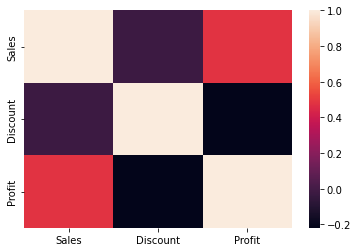

In [18]:
sa.heatmap(r,xticklabels=r.columns,yticklabels=r.columns)

In [19]:
ship_mode=data["Ship Mode"]
Segment=data["Segment"]
State=data["State"]
ship_mode=data["Ship Mode"]
Region=data["Region"]
Category= data["Category"]
Sub_Category= data["Sub-Category"]
Sales= data["Sales"]
Category= data["Category"]
City= data["City"]
Discount = data["Discount"]
Profit = data["Profit"]

#### Checking Relationsip with profit

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

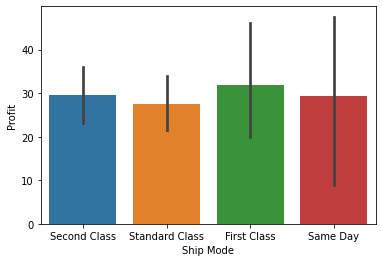

In [20]:
sa.barplot(y=Profit, x=ship_mode)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

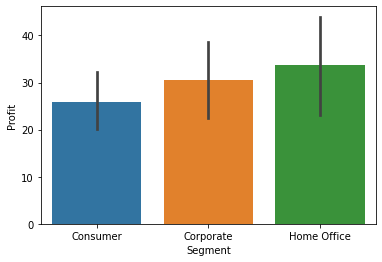

In [21]:
sa.barplot(y=Profit, x=Segment )

<AxesSubplot:xlabel='City', ylabel='Profit'>

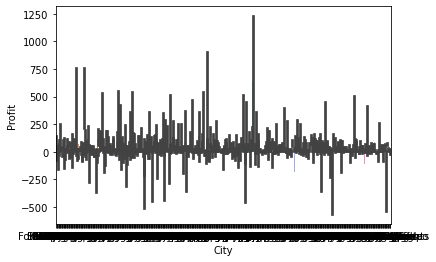

In [22]:
sa.barplot(y=Profit, x=City )

<AxesSubplot:xlabel='Region', ylabel='Profit'>

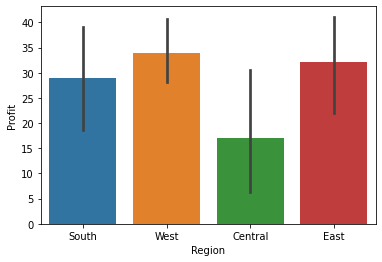

In [23]:
sa.barplot(y=Profit, x=Region  )

<AxesSubplot:xlabel='Category', ylabel='Profit'>

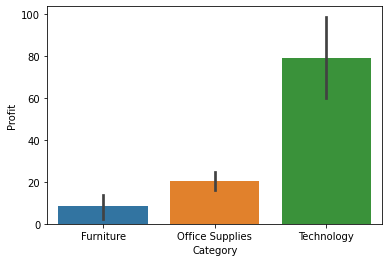

In [24]:
sa.barplot(y=Profit, x=Category)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

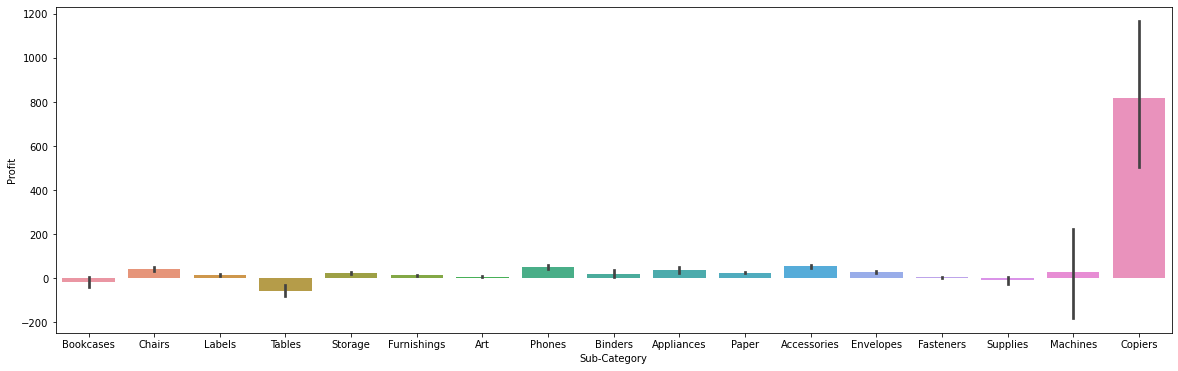

In [25]:
plt.figure(figsize= (20,6))
sa.barplot(y=Profit, x=Sub_Category )

<function matplotlib.pyplot.show(close=None, block=None)>

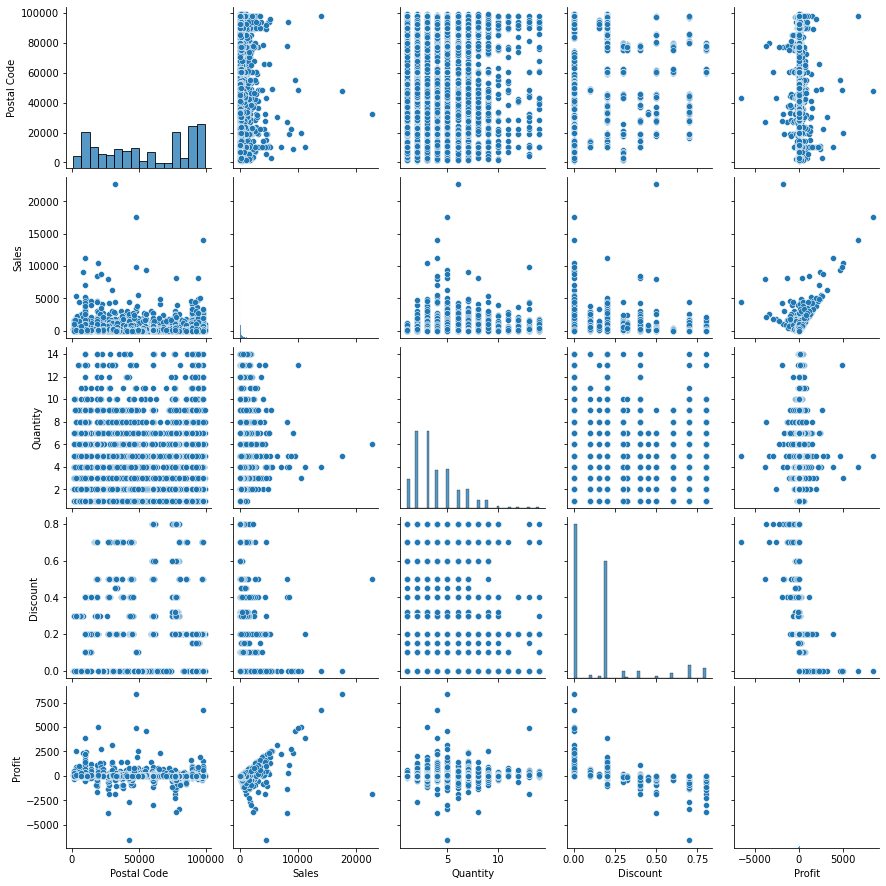

In [26]:
sa.pairplot(data)
plt.show

C:\Users\Aizaz\AppData\Local\Temp/ipykernel_11604/3722985754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Category")["Profit","Sales"].agg(["sum"]).plot.bar()


<AxesSubplot:xlabel='Category'>

<Figure size 504x504 with 0 Axes>

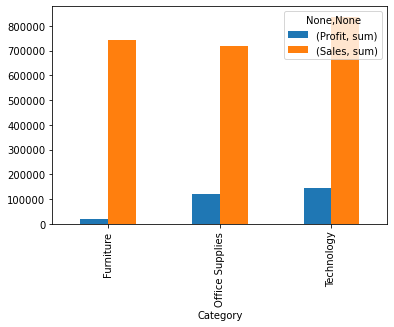

In [27]:
plt.figure(figsize=(7,7))
data.groupby("Category")["Profit","Sales"].agg(["sum"]).plot.bar()

#### Computing Catrgory in term of sales and profit

<AxesSubplot:xlabel='Category'>

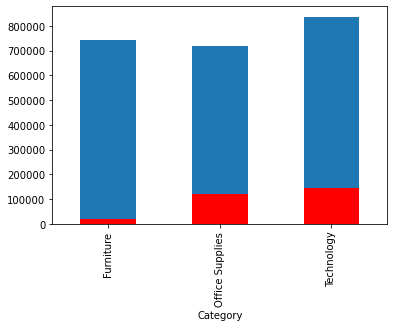

In [28]:
sal=data.groupby("Category").Sales.sum()
pro=data.groupby("Category").Profit.sum()
sal.plot(kind="bar")
pro.plot(kind="bar",color="red")

#### Computing Sub-Catrgory in term of sales and profit

<AxesSubplot:xlabel='Sub-Category'>

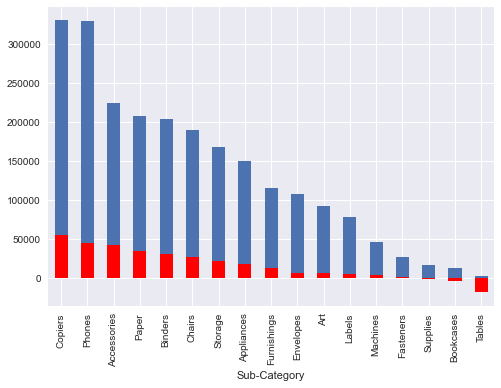

In [29]:
sale=data.groupby("Sub-Category").Sales.sum().nlargest(n=100)
prof=data.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use("seaborn")
sale.plot(kind="bar")
prof.plot(kind="bar",color="red")

#### detial view by using Barh graph

<AxesSubplot:ylabel='Sub-Category'>

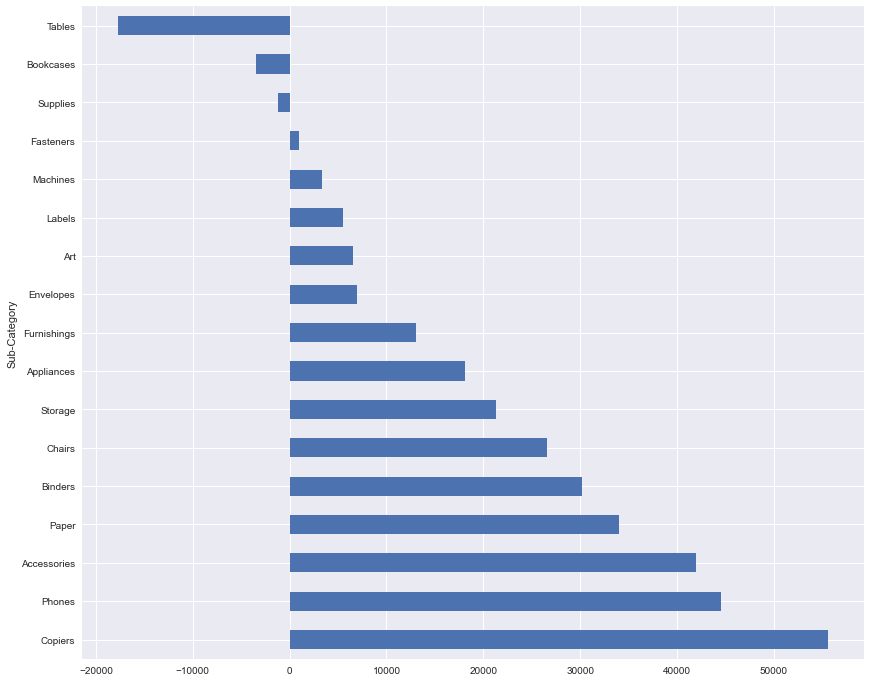

In [30]:
plt.figure(figsize=(14,12))
state_view= data.groupby(["Sub-Category"])["Profit"].sum().nlargest(50)
state_view.plot.barh()

Above graph clearly shows that copier and phones have the highest sales and profit Table,bookcases has negative profit

<AxesSubplot:ylabel='Sub-Category'>

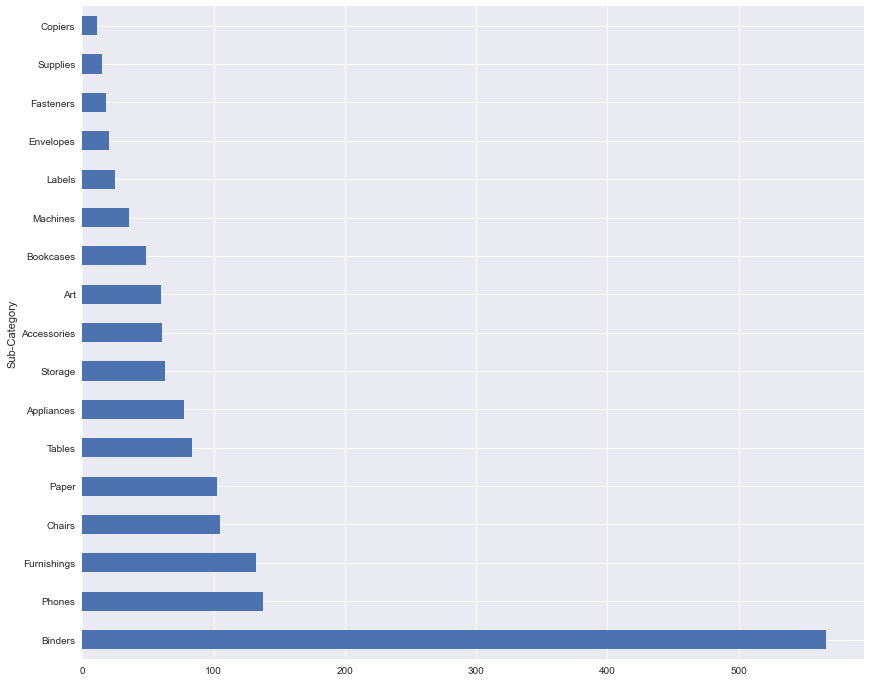

In [31]:
plt.figure(figsize=(14,12))
state_view= data.groupby(["Sub-Category"])["Discount"].sum().nlargest(50)
state_view.plot.barh()

in above graph its clearly see that if we less in the Discount in table and bookcase then it will give Profit

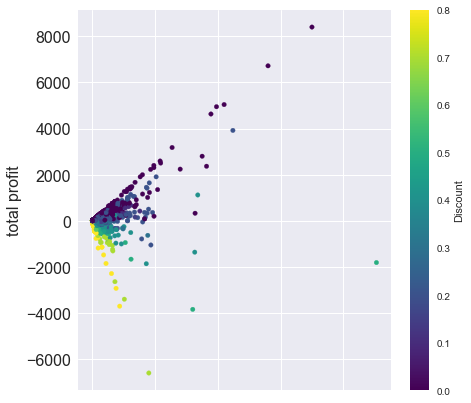

In [32]:
plt.style.use("seaborn")
data.plot(kind ="scatter",figsize=(7,7),x="Sales",y="Profit",c="Discount",s=20,fontsize=16,colormap="viridis")
plt.ylabel("total profit",fontsize=16)
plt.show()

the graph clearly shows that if we give more Discount on our products Sales increase but profit decrease

### Conclusion

The weak Area where can work hard to make more profit

- we should work on Central region because its give less profit
- we should limit sales of Furniture and increase the sale of technology and officer supplier because its give more profit
- sales of Table and Bookcase should be Minized because it not give profit
- No Discount offer on Table and Bookcase so that its give as profit
- More sales for Phones and copier so its give more profit

### Now Predict Sales

In [33]:
data.drop(['CustomerName','City','State','Country','Region','Product Name'],axis=1,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9992
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Date     9993 non-null   object 
 3   Ship Mode     9993 non-null   object 
 4   Customer ID   9993 non-null   object 
 5   Segment       9993 non-null   object 
 6   Postal Code   9993 non-null   float64
 7   Product ID    9993 non-null   object 
 8   Category      9993 non-null   object 
 9   Sub-Category  9993 non-null   object 
 10  Sales         9993 non-null   float64
 11  Quantity      9993 non-null   float64
 12  Discount      9993 non-null   float64
 13  Profit        9993 non-null   float64
dtypes: float64(5), object(9)
memory usage: 1.4+ MB


In [35]:
df=pd.get_dummies(data)
df.head()

,Postal Code,Sales,Quantity,Discount,Profit,Order ID_CA-2014-100006,Order ID_CA-2014-100090,Order ID_CA-2014-100293,Order ID_CA-2014-100328,Order ID_CA-2014-100363,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420.0,261.9600,2.0,0.00,41.9136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42420.0,731.9400,3.0,0.00,219.5820,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90036.0,14.6200,2.0,0.00,6.8714,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,33311.0,957.5775,5.0,0.45,-383.0310,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33311.0,22.3680,2.0,0.20,2.5164,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
X = df.drop('Sales',axis=1)
X.shape

(9993, 10265)

In [37]:
y = df['Sales']
y.shape

(9993,)

In [38]:
 x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [39]:
r =RandomForestRegressor(bootstrap=True,n_estimators = 100, oob_score = False, n_jobs = -1,random_state =0,max_depth=None,max_features = "auto", min_samples_leaf = 1, min_samples_split=2)

In [ ]:
r.fit(x_train,y_train)

In [ ]:
r.score(x_train,y_train),r.score(x_test,y_test)

### Predict Profit

In [ ]:
data.head()

In [ ]:
ndat=data[["Sub-Category","Discount","Sales","Profit"]]

In [ ]:
ndat.head()

In [ ]:
ndat.tail()

In [ ]:
ndat.info()

In [ ]:
ndat=pd.get_dummies(ndat,drop_first=True)

In [ ]:
ndat.head()

In [ ]:
x1=ndat.drop("Profit", axis=1)

In [ ]:
y1=ndat["Profit"]

In [ ]:
x1.shape,y1.shape

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x1, y1,random_state=0)

In [ ]:
p =RandomForestRegressor(bootstrap=True,n_estimators = 100, oob_score = False, n_jobs = -1,random_state =0,max_depth=None,max_features = "auto", min_samples_leaf = 1, min_samples_split=2)

In [ ]:
p.fit(x_train,y_train)

In [ ]:
p.score(x_train,y_train),p.score(x_test,y_test)

In [ ]:
guess=[[0.2,22.368,2.5164,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]]

In [ ]:
#print(len(guess))

In [ ]:
pre=p.predict(guess)
pre

## Time Anaylsis

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data["Order Date"] = pd.to_datetime(data["Order Date"],infer_datetime_format=True)
data["Ship Date"] = pd.to_datetime(data["Ship Date"],infer_datetime_format=True)

In [ ]:
data.info()

In [ ]:
dat=data[["Order Date","Sales"]]
dat.head(2)

In [ ]:
dat.tail(2)

In [ ]:
ddat=dat.sort_values(by="Order Date")
ddat.head()

In [ ]:
#ddat.set_index("Order Date" , inplace= True)

In [ ]:
from matplotlib.pyplot import dates 

In [ ]:
#ddat.plot()
#plt.plot(ddat["Sales"], linewidth = '.5')
#dat.plot(x="Order Date", y="Sales", kind="line")

In [ ]:
dat.describe()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dat)
plt.show()

### Test for stationarity

In [ ]:
from